Author: Pedro Henrique Nunes Salgueiro

Reach me at salgueiro@usp.br for any comments, feedback or inquiries.

# Exploring German Election Data

In this portfolio project I will look over some data on the 2021 German elections for the Bundestag. It will be a simple analysis, with the main purpose of demonstrating skills with data manipulation and visualization libraries, as well as my thought process when dealing with a new data set.

The data was obtained from: https://www.bundeswahlleiter.de/bundestagswahlen/2021/ergebnisse/opendata.html (in german)

## Context

The 2021 German election was a special one because Angela Merkel, who had been chancellor for 16 years, would no longer be a candidate. Despite the fact that German citizens do not elect the chancellor directly, the candidate the party they vote for supports has a big effect in determining their vote.

The winner ended up beingt the then finance minister Olaf Scholz, from the center left-party SPD. Being somewhat a moderate figure inside the SPD, he won on demonstrating being a more prudent choice, at least in comparison with the other candidates. The election ended up being a big win for his party, and a welcome one at that: they had only recently been polling quite low, presumably because the average center-left voter was dissatisfied with the concessions the party was making in it's coalition with the CDU.

In the election, the Germans cast two votes: one for the local representative of their electoral district ('Wahlkreis') and one for a party of their choice. The final distribution of seats is ultimately determined by this second vote, which is why we'll be primarily concerned with it in this analysis.

After the seat distribution is determined, the parties negotiate in order to form a ruling coalition. Along with the SPD, the liberal party FDP (which showed promising results among young voters) and the Greens (Grünen, which had the best result in their history, but left with a somewhat lukewarm aftertaste as some supporters expected more). The opposition is now formed of the CDU and it's sister party, the CSU (which is the CDU in Bavaria (Long story...)), along with the far-right AfD (that seems to have stagnated without an immigration crisis) and the far-left Die Linke (which almost didn't get in the Bundestag because of the 5% mininum vote barrier).

## Small Glossary

Gebiet = area

Art = type

Prozent = Percentage

Stimme = vote

## Initial Look

In [1]:
import numpy as np
import pandas as pd

In [2]:
results = pd.read_csv('kerg2_00287.csv', skiprows=9, sep=';')

In [3]:
results.head()

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
0,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Wahlberechtigte,-4,NaN,61181072.0,NaN,61688485.0,NaN,"-0,822541",NaN,NaN
1,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Wählende,-3,NaN,46854508.0,"76,583339",46976341.0,"76,150907","-0,25935","0,432432",NaN
2,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Ungültige,-2,1.0,492495.0,"1,051116",586726.0,"1,248982","-16,060478","-0,197866",NaN
3,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Ungültige,-2,2.0,412485.0,"0,880353",460849.0,"0,981024","-10,494544","-0,100671",NaN
4,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Gültige,-1,1.0,46362013.0,"98,948884",46389615.0,"98,751018","-0,0595","0,197866",NaN


In [4]:
results[results['Gebietsnummer']==180]

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
11576,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,System-Gruppe,Wahlberechtigte,-4,NaN,176271.0,NaN,177469.0,NaN,"-0,675047",NaN,NaN
11577,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,System-Gruppe,Wählende,-3,NaN,131412.0,"74,551117",134190.0,"75,613206","-2,070199","-1,062088",NaN
11578,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,System-Gruppe,Ungültige,-2,1.0,2036.0,"1,549326",2131.0,"1,588047","-4,458001","-0,038721",NaN
11579,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,System-Gruppe,Ungültige,-2,2.0,1760.0,"1,339299",1867.0,"1,391311","-5,731119","-0,052012",NaN
11580,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,System-Gruppe,Gültige,-1,1.0,129376.0,"98,450674",132059.0,"98,411953","-2,031668","0,038721",NaN
11581,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,System-Gruppe,Gültige,-1,2.0,129652.0,"98,660701",132323.0,"98,608689","-2,018546","0,052012",NaN
11582,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,Partei,CDU,1,1.0,36019.0,"27,840558",46656.0,"35,329663","-22,798783","-7,489106",NaN
11583,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,Partei,CDU,1,2.0,29223.0,"22,539567",39126.0,"29,568556","-25,310535","-7,028988",NaN
11584,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,Partei,SPD,2,1.0,40291.0,"31,142561",40185.0,"30,429581","0,26378","0,71298",NaN
11585,BT,26.09.2021,Wahlkreis,180,Hanau,LAND,6.0,Partei,SPD,2,2.0,35739.0,"27,565329",31150.0,"23,540881","14,731942","4,024448",NaN


The data is perfectly tidy, each row is a particular observation, each column a variable. Most data that "don't apply" has been marked as NaN by Pandas.

Let's take a closer look at `gebietsart` (type of area).

In [5]:
results['Gebietsart'].unique()

array(['Bund', 'Land', 'Wahlkreis'], dtype=object)

Three types of area: the entire country ('Bund'), the federal state ('Land') and the electoral district ('Wahlkreis').

Let's check out what parties there are.

In [6]:
#separating second vote and whole-federal-state observations
land_2nd_vote = results[
    (results['Gebietsart']=='Land')&
    (results['Gruppenart']!='System-Gruppe')& #this group type seems to refer to info about the election itself, etc.
    (results['Stimme']==2)
    ]

In [7]:
land_2nd_vote

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
110,BT,26.09.2021,Land,1,Schleswig-Holstein,BUND,99.0,Partei,CDU,1,2.0,388399.0,"22,033647",583135.0,"33,989337","-33,394668","-11,95569",NaN
112,BT,26.09.2021,Land,1,Schleswig-Holstein,BUND,99.0,Partei,SPD,2,2.0,494055.0,"28,02745",399505.0,"23,286049","23,666788","4,741401",NaN
114,BT,26.09.2021,Land,1,Schleswig-Holstein,BUND,99.0,Partei,FDP,3,2.0,220039.0,"12,482683",216844.0,"12,639241","1,473409","-0,156558",NaN
116,BT,26.09.2021,Land,1,Schleswig-Holstein,BUND,99.0,Partei,GRÜNE,4,2.0,322763.0,"18,310156",205471.0,"11,97634","57,084455","6,333816",NaN
118,BT,26.09.2021,Land,1,Schleswig-Holstein,BUND,99.0,Partei,AfD,5,2.0,119566.0,"6,782909",140362.0,"8,181315","-14,815976","-1,398406",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,BT,26.09.2021,Land,10,Saarland,BUND,99.0,Partei,Tierschutzpartei,13,2.0,16231.0,"2,829337",NaN,NaN,NaN,NaN,NaN
990,BT,26.09.2021,Land,10,Saarland,BUND,99.0,Partei,Team Todenhöfer,14,2.0,2281.0,"0,397617",NaN,NaN,NaN,NaN,NaN
992,BT,26.09.2021,Land,10,Saarland,BUND,99.0,Partei,Volt,15,2.0,4019.0,"0,700579",NaN,NaN,NaN,NaN,NaN
994,BT,26.09.2021,Land,10,Saarland,BUND,99.0,Partei,GRÜNE,16,2.0,NaN,NaN,35117.0,"6,00026",NaN,"-6,00026",NaN


In [8]:
land_2nd_vote['Gruppenname'].nunique()

47

47 unique parties.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's take a closer look at a particular district, chosen at random and definitely not because I know someone from there: Unna I.

In [10]:
unna_eins_zs = results[
    (results['Gebietsnummer']==144)&
    (results['Gruppenart']!='System-Gruppe')&
    (results['Stimme']==2)
    ]

In [11]:
# Anzahl = count
party_votes_unna_i = unna_eins_zs.loc[:,['Gruppenname', 'Anzahl']].sort_values('Anzahl', ascending=False)

Text(0.5, 0, 'Vote Count')

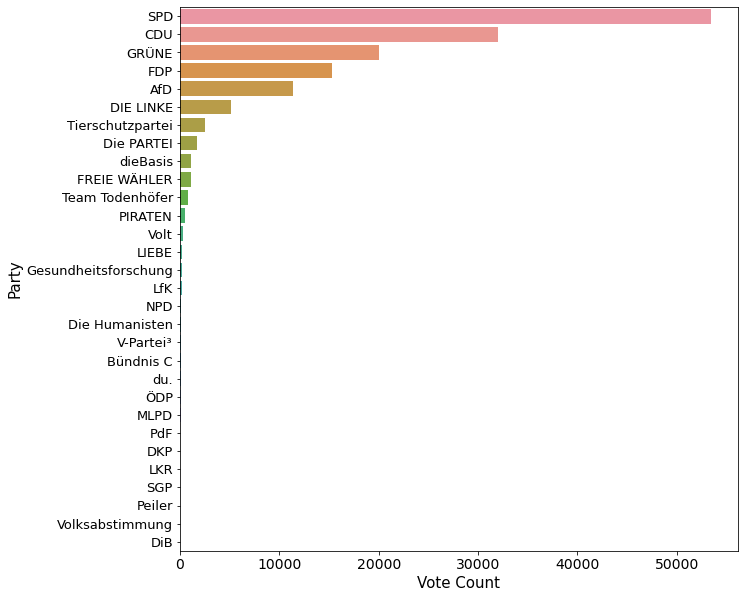

In [12]:
fig = plt.figure(figsize=(10, 10))

ax = sns.barplot(data=party_votes_unna_i, y='Gruppenname', x='Anzahl')

ax.set_xticks(np.arange(np.min(party_votes_unna_i['Anzahl']), np.max(party_votes_unna_i['Anzahl']), 10000), 
              labels=np.arange(0,60000, 10000)
             )
ax.set_yticklabels(labels=ax.get_yticklabels(), fontdict={'fontsize':13})
ax.set_xticklabels(labels=ax.get_xticklabels(), fontdict={'fontsize':14})
ax.set_ylabel(ylabel='Party', fontdict={'fontsize':15})
ax.set_xlabel(xlabel='Vote Count', fontdict={'fontsize':15})

Let's set up a little function to quickly get a table with votes by party and plot it.

In [13]:
def get_votes(gebiet_number, first_or_second, plot=False):
    #Takes the area number (from the Gebietsnummer column) and whether the vote is the first or the second
    if type(gebiet_number) == list:
        votes_by_party = (
            results[
                (np.logical_or.reduce([results['Gebietsnummer']==gn for gn in gebiet_number]))&
                (results['Gruppenart']!='System-Gruppe')&
                (results['Stimme']==first_or_second)
            ]
            .loc[:,['Gruppenname', 'Anzahl']]
            .groupby('Gruppenname').sum()
            .reset_index()
            .sort_values('Anzahl', ascending=False))
    else:
        votes_by_party = results[(results['Gebietsnummer']==gebiet_number)&(results['Gruppenart']!='System-Gruppe')&(results['Stimme']==first_or_second)].loc[:,['Gruppenname', 'Anzahl']].sort_values('Anzahl', ascending=False)

    if plot:
        fig = plt.figure(figsize=(10, 10))

        ax = sns.barplot(data=party_votes_unna_i, y='Gruppenname', x='Anzahl')

        ax.set_xticks(np.arange(np.min(party_votes_unna_i['Anzahl']), np.max(party_votes_unna_i['Anzahl']), 10000), 
                  labels=np.arange(0,60000, 10000)
                 )
        ax.set_yticklabels(labels=ax.get_yticklabels(), fontdict={'fontsize':13})
        ax.set_xticklabels(labels=ax.get_xticklabels(), fontdict={'fontsize':14})
        ax.set_ylabel(ylabel='Party', fontdict={'fontsize':15})
        ax.set_xlabel(xlabel='Vote Count', fontdict={'fontsize':15})
    return votes_by_party

,Gruppenname,Anzahl
9420,SPD,59869.0
9418,CDU,36810.0
9426,GRÜNE,20340.0
9424,AfD,11736.0
9422,FDP,9137.0
9428,DIE LINKE,4731.0
9436,FREIE WÄHLER,1967.0
9454,dieBasis,1451.0
9472,Peiler,535.0
9446,MLPD,185.0


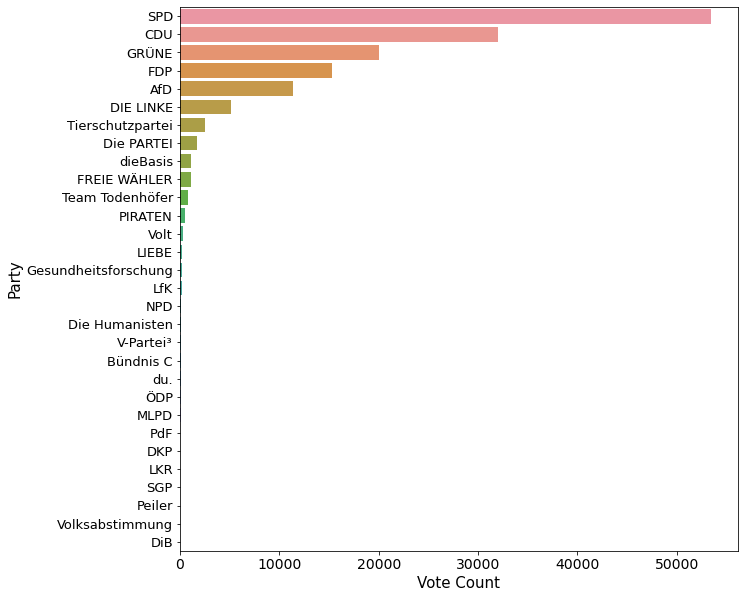

In [14]:
get_votes(144, 1, plot=True)

I wonder how first votes tend to differ from second votes. Since not all those minor parties are able to present a direct candidate in every electoral district, their voters probably move to one of the bigger parties for the first vote.

In [15]:
unna_1st_vs_2nd = get_votes(144, 1).merge(get_votes(144, 2), on='Gruppenname', suffixes=['_first', '_second'])

In [16]:
unna_1st_vs_2nd

,Gruppenname,Anzahl_first,Anzahl_second
0,SPD,59869.0,53490.0
1,CDU,36810.0,31995.0
2,GRÜNE,20340.0,20022.0
3,AfD,11736.0,11428.0
4,FDP,9137.0,15286.0
5,DIE LINKE,4731.0,5154.0
6,FREIE WÄHLER,1967.0,1088.0
7,dieBasis,1451.0,1151.0
8,Peiler,535.0,NaN
9,MLPD,185.0,64.0


As predicted, except for the FDP and die Linke, all bigger parties get a boost in first votes compared to second votes. Perhaps the voters from these two parties didn't like the particular candidates presented in the district.

There is one group, Peiler, which has only first votes.

In [17]:
results[results['Gruppenname']=='Peiler']

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
9472,BT,26.09.2021,Wahlkreis,144,Unna I,LAND,5.0,Einzelbewerber/Wählergruppe,Peiler,28,1.0,535.0,"0,364538",NaN,NaN,NaN,NaN,NaN
9473,BT,26.09.2021,Wahlkreis,144,Unna I,LAND,5.0,Einzelbewerber/Wählergruppe,Peiler,28,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon further inspection and a little Googling, we see it's a woman who got in the election independently.

Source: https://www.antenneunna.de/artikel/nadine-peiler-parteifrei-1044502.html

## Ranking federal states' votes

Just out of curiosity, let's rank the federal states by percentage of AfD vote.

In [18]:
(results[(results['Gebietsart']=='Land')&
        (results['Gruppenname']=='AfD')&
        (results['Stimme']==2)]
        .sort_values('Prozent', ascending=False))[['Gebietsname', 'Gruppenname', 'Prozent']]

,Gebietsname,Gruppenname,Prozent
905,Baden-Württemberg,AfD,"9,602834"
783,Rheinland-Pfalz,AfD,"9,219837"
836,Bayern,AfD,"8,980147"
669,Hessen,AfD,"8,815351"
474,Berlin,AfD,"8,4143"
271,Niedersachsen,AfD,"7,43793"
541,Nordrhein-Westfalen,AfD,"7,256349"
328,Bremen,AfD,"6,881783"
118,Schleswig-Holstein,AfD,"6,782909"
220,Hamburg,AfD,"5,025837"


Ranking didn't work, let's see why.

In [19]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18818 entries, 0 to 18817
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wahlart             18818 non-null  object 
 1   Wahltag             18818 non-null  object 
 2   Gebietsart          18818 non-null  object 
 3   Gebietsnummer       18818 non-null  int64  
 4   Gebietsname         18818 non-null  object 
 5   UegGebietsart       18715 non-null  object 
 6   UegGebietsnummer    18715 non-null  float64
 7   Gruppenart          18818 non-null  object 
 8   Gruppenname         18818 non-null  object 
 9   Gruppenreihenfolge  18818 non-null  int64  
 10  Stimme              18186 non-null  float64
 11  Anzahl              12970 non-null  float64
 12  Prozent             12654 non-null  object 
 13  VorpAnzahl          10569 non-null  float64
 14  VorpProzent         10253 non-null  object 
 15  DiffProzent         9223 non-null   object 
 16  Diff

Column d-type is set up as object.

In [20]:
results['Prozent'] = pd.to_numeric(results['Prozent'].str.replace(',', '.'))

In [21]:
results['Prozent']

0              NaN
1        76.583339
2         1.051116
3         0.880353
4        98.948884
           ...    
18813          NaN
18814          NaN
18815          NaN
18816          NaN
18817          NaN
Name: Prozent, Length: 18818, dtype: float64

In [22]:
results[(results['Gebietsart']=='Land')&(results['Gruppenname']=='AfD')&(results['Stimme']==2)].sort_values('Prozent', ascending=False).loc[:,['Gebietsname','Prozent']]

,Gebietsname,Prozent
604,Sachsen,24.647559
728,Thüringen,23.972675
419,Sachsen-Anhalt,19.592659
370,Brandenburg,18.135735
165,Mecklenburg-Vorpommern,17.994273
970,Saarland,10.045706
905,Baden-Württemberg,9.602834
783,Rheinland-Pfalz,9.219837
836,Bayern,8.980147
669,Hessen,8.815351


The numbers in the West are still more expressive than I thought. Especially in Saarland and the southern states. I guess I don't know Germany all that well after all.

Let's do a couple more. First a function.

In [23]:
def party_by_bundesland(party):
    pbb = (results[(results['Gebietsart']=='Land')&
                  (results['Gruppenname']==party)&
                  (results['Stimme']==2)]).sort_values('Prozent', ascending=False).loc[:,['Gebietsname','Prozent']]
    return pbb

First the big winners.

In [24]:
party_by_bundesland('SPD')

,Gebietsname,Prozent
966,Saarland,37.264934
267,Niedersachsen,33.129047
320,Bremen,31.466894
212,Hamburg,29.669711
372,Brandenburg,29.456089
781,Rheinland-Pfalz,29.369724
537,Nordrhein-Westfalen,29.128411
169,Mecklenburg-Vorpommern,29.097827
112,Schleswig-Holstein,28.027450
667,Hessen,27.570051


## Comparing federal states: strange correlations in party votes

Let's try comparing the big 2

In [25]:
party_by_bundesland('SPD').merge(party_by_bundesland('CDU'), on='Gebietsname', suffixes=(('SPD', 'CDU')))

,Gebietsname,ProzentSPD,ProzentCDU
0,Saarland,37.264934,23.556134
1,Niedersachsen,33.129047,24.176997
2,Bremen,31.466894,17.223204
3,Hamburg,29.669711,15.436420
4,Brandenburg,29.456089,15.290561
5,Rheinland-Pfalz,29.369724,24.699891
6,Nordrhein-Westfalen,29.128411,25.957840
7,Mecklenburg-Vorpommern,29.097827,17.424110
8,Schleswig-Holstein,28.027450,22.033647
9,Hessen,27.570051,22.828094


The only one in which the CDU won was Badden-Württemberg.

Wait, actually, we aren't being fair, we have to count the two sister parties.

In [26]:
party_by_bundesland('SPD').merge(party_by_bundesland('CSU'), on='Gebietsname')

,Gebietsname,Prozent_x,Prozent_y
0,Bayern,17.978942,31.735935


So the union also won in Bayern, and by a large margin. But I suppose it's a special case.

Now, in the spirit of comparing "opposites":

In [27]:
party_by_bundesland('AfD').merge(party_by_bundesland('DIE LINKE'), on='Gebietsname', suffixes=[' AfD', ' Linke'])

,Gebietsname,Prozent AfD,Prozent Linke
0,Sachsen,24.647559,9.339083
1,Thüringen,23.972675,11.438987
2,Sachsen-Anhalt,19.592659,9.595321
3,Brandenburg,18.135735,8.483156
4,Mecklenburg-Vorpommern,17.994273,11.071884
5,Saarland,10.045706,7.169652
6,Baden-Württemberg,9.602834,3.308996
7,Rheinland-Pfalz,9.219837,3.261270
8,Bayern,8.980147,2.784695
9,Hessen,8.815351,4.319697


These seems to be a correlation, right?

In [28]:
extreme_votes = party_by_bundesland('AfD').merge(party_by_bundesland('DIE LINKE'), on='Gebietsname', suffixes=[' AfD', ' Linke'])

np.corrcoef(extreme_votes['Prozent AfD'], y=extreme_votes['Prozent Linke'])

array([[1.        , 0.66155812],
       [0.66155812, 1.        ]])

In [29]:
import seaborn as sns

In [30]:
sns.set_palette('tab20')

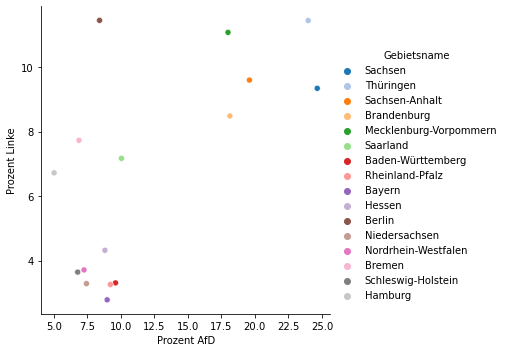

In [31]:
sns.relplot(data=extreme_votes, x='Prozent AfD', y='Prozent Linke', hue='Gebietsname')

There is an expressive correlation.

This measures the parties that are at the extremes of the currently represented political spectrum in the Bundestag. But what if we measure an extreme party with it's more moderate counterpart?

In [32]:
votes_to_the_right = party_by_bundesland('AfD').merge(party_by_bundesland('CDU'), on='Gebietsname', suffixes=[' AfD', ' CDU'])

votes_to_the_right

,Gebietsname,Prozent AfD,Prozent CDU
0,Sachsen,24.647559,17.169983
1,Thüringen,23.972675,16.871859
2,Sachsen-Anhalt,19.592659,20.989900
3,Brandenburg,18.135735,15.290561
4,Mecklenburg-Vorpommern,17.994273,17.424110
5,Saarland,10.045706,23.556134
6,Baden-Württemberg,9.602834,24.835234
7,Rheinland-Pfalz,9.219837,24.699891
8,Hessen,8.815351,22.828094
9,Berlin,8.414300,15.859740


In [33]:
np.corrcoef(votes_to_the_right['Prozent AfD'], y=votes_to_the_right['Prozent CDU'])

array([[ 1.        , -0.40771571],
       [-0.40771571,  1.        ]])

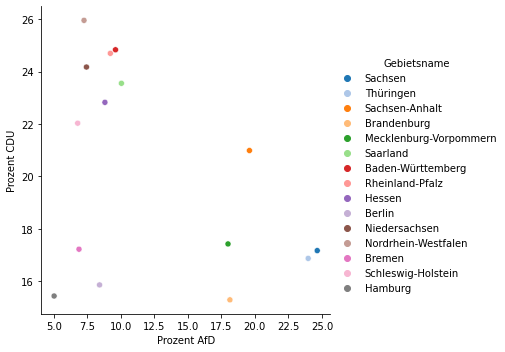

In [34]:
sns.relplot(data=votes_to_the_right, x='Prozent AfD', y='Prozent CDU', hue='Gebietsname')

We do get a negative correlation, that's not super strong, but in retrospect could be expected.

**In places where people vote more "extreme", people who are conservative will more likely vote in the AfD and not in the CDU. This would suggest that the level of "extremism" in the federal state influences more the relationship between votes in the AfD and the CDU than the level of "conservativeness". As in: they tend to follow opposite directions rather than grow together.**

But how could we measure those effects? [I don't know and I'd rather note derail too much into this, but if you do and would like to explain feel free to contact me.]

This makes me interested in two other correlations.

In [35]:
def get_correl(party1, party2, debug=False):
    merged = party_by_bundesland(party1).merge(party_by_bundesland(party2), on='Gebietsname', suffixes=[' ' + party1, ' ' + party2]).fillna(0)
    if debug == True:
        print(merged)
    return np.corrcoef(merged['Prozent ' + party1], y=merged['Prozent ' + party2])[0][1]


In [36]:
get_correl('SPD', 'CDU')

0.25550701683988225

In [37]:
get_correl('SPD', 'DIE LINKE')

-0.08978862614556178

It certainly feels counterintuitive to me that parties from opposite ends of the political spectrum correlate positively with each other while different parties from the same "side" correlate negatively.

It does make sense, though, taking into account the situation.

## East and West: Iron curtain of the mind

One thing that will immediately pop out to anyone familiar with German politics when looking at the scatterplots above is that you can clearly see two clusters of states: those belonging to what was formerly known as West Germany and those of the states that were rejoined into it after the german reunification.

In fact, it seems like the peculiar correlations we've been seeing could be much better explained by the different voting habits of the two sides. Let's add markings to indicating whether the Bundesland is is formerly from the DDR (East Germany) or not. 

In [38]:
bundeslaender = list(results[results['Gebietsart']=='Land']['Gebietsname'].unique())

In [39]:
former_east_germany = ['Mecklenburg-Vorpommern', 'Brandenburg', 'Sachsen', 'Thüringen', 'Sachsen-Anhalt']
former_west_germany = [i for i in bundeslaender if i not in former_east_germany]

Berlin will be considered fully "West Germany" for the purpose of this analysis.

In [40]:
def mapping_east_or_west(place):
    if place in former_east_germany:
        return 'ost'
    elif place in former_west_germany:
        return 'west'
    else:
        return np.nan

In [41]:
results['vorEinheit'] = results['Gebietsname'].apply(mapping_east_or_west)

In [42]:
#updating functions
def party_by_bundesland(party, east_west='both'):
    if east_west=='both':
        ew_param = pd.Series([True] * results.shape[0])
    elif east_west=='east':
        ew_param = (results['vorEinheit']=='ost')
    elif east_west=='west':
        ew_param = (results['vorEinheit']=='west')
        
    return (results[
                (results['Gebietsart']=='Land')&
                (results['Gruppenname']==party)&
                (results['Stimme']==2)&
                (ew_param)
                ]
                 .sort_values('Prozent', ascending=False)
                 .loc[:,['Gebietsname','Prozent']]
    )

def get_correl(party1, party2, table=False, plot=False, east_west='both'):
    merged = (
            party_by_bundesland(party1, east_west=east_west)
                  .merge(
                      party_by_bundesland(party2, east_west=east_west),
                      on='Gebietsname', 
                      suffixes=[' ' + party1, ' ' + party2]
                    )
                      .fillna(0)
             )
    merged['Before reunification'] = merged['Gebietsname'].apply(mapping_east_or_west)
    if table == True:
        print(merged)
    if plot==True:
        sns.relplot(data=merged, x=merged['Prozent ' + party1], y=merged['Prozent ' + party2], hue=merged['Gebietsname'], style=merged['Before reunification']).set_titles('Bundestagswahl Votes Percentage')
    return np.corrcoef(merged['Prozent ' + party1], y=merged['Prozent ' + party2])[0][1]

Now let us check the graphs again.

0.661558122570109

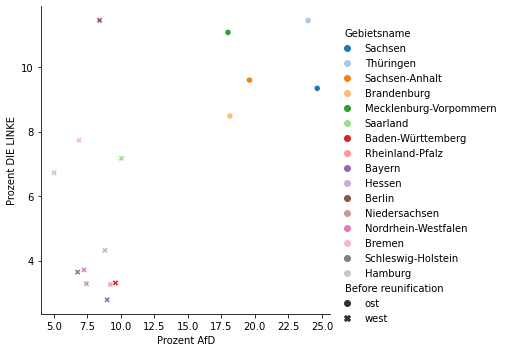

In [43]:
get_correl('AfD', 'DIE LINKE', plot=True)

**We can clearly see the group of eastern states on the top right of the graph**, representing a higher percentage of votes in both Die Linke and in the AfD. If we remove them...

-0.12633970101853137

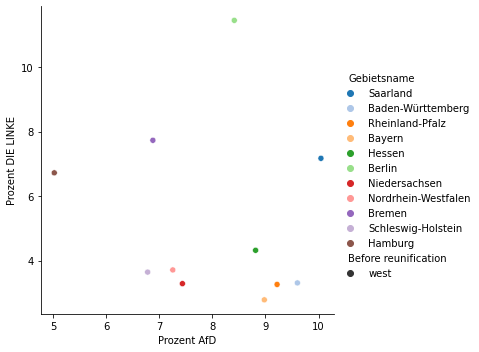

In [44]:
get_correl('AfD', 'DIE LINKE', plot=True, east_west='west')

We get a negative correlation. **This means the positive correlation between both parties that we saw is mostly explained by the east/west divide.**

Now let's try 'AfD' and 'CDU'.

-0.40771570786489114

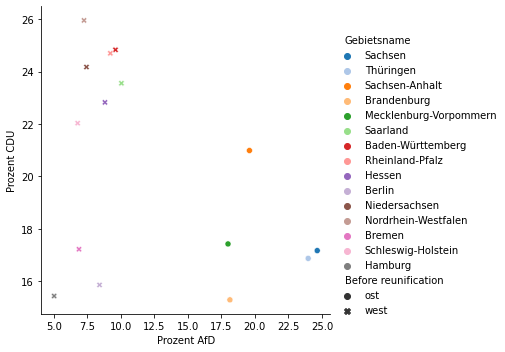

In [45]:
get_correl('AfD', 'CDU', plot=True)

Again, we can see the east isolated in a corner, representing a lower CDU percentage and a higher AfD percentage. (Do notice the difference in scale between the graphs. While the percentage of CDU votes is lower than average, it's still a relatively high value, around 18%)

**We can also see a third cluster in the bottom left**: Berlin, Hamburg and Bremen, the german city-states, representing a relatively low percentage for both AfD and CDU. Their populations, as urban populations tend to do, are more left leaning than the other Bundeslaender which include both big cities and the countryside.

0.5376553353836949

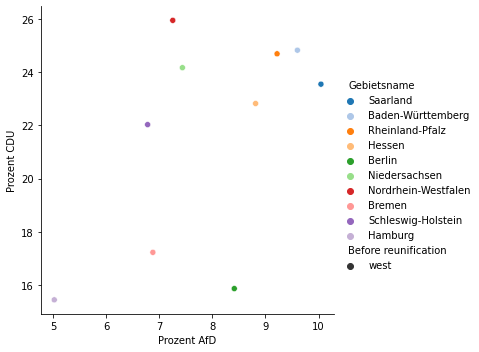

In [46]:
get_correl('AfD', 'CDU', plot=True, east_west='west')

Once again, by isolating the West, the correlation that was in the mid-negatives jumps to the mid-positives, indicating the same effect.

Now let's take a look at the more traditional parties:

0.25550701683988225

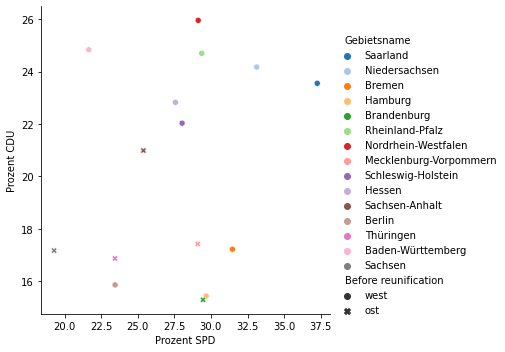

In [47]:
get_correl('SPD', 'CDU', plot=True)

Do notice, from the scales on both axes, that both parties have very high percentages, as opposed to previous comparisons where one of the axes had much lower values.

You can still see the 'east' and 'city-state' effects though, although **this time the east and the city states are somewhat mixed together in a rejection of the traditional establishment parties.**

There's one last correlation I want to look at for now.

-0.1098899402012342

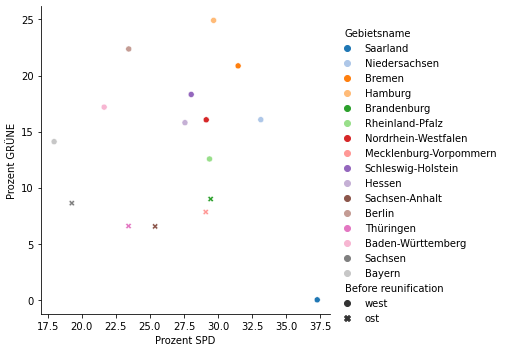

In [48]:
get_correl('SPD', 'GRÜNE', plot=True)

As some of you might know, the Greens weren't able to submit a candidate list for the election in Saarland. This was due to some legal inner-party turmoil. That also means they're heavily distorting our analysis due to a technicality.

In [49]:
def get_correl_for_the_greens_without_saarland(party1, party2='GRÜNE', table=False, plot=False, east_west='both'):
    merged = (
            party_by_bundesland(party1, east_west=east_west)
                  .merge(
                      party_by_bundesland(party2, east_west=east_west),
                      on='Gebietsname', 
                      suffixes=[' ' + party1, ' ' + party2]
                    )
                      .fillna(0)
             )
    merged['Before reunification'] = merged['Gebietsname'].apply(mapping_east_or_west)
    merged = merged[merged['Gebietsname']!='Saarland']
    if table == True:
        print(merged)
    if plot==True:
        sns.relplot(data=merged, x=merged['Prozent ' + party1], y=merged['Prozent ' + party2], hue=merged['Gebietsname'], style=merged['Before reunification']).set_titles('Bundestagswahl Votes Percentage')
    return np.corrcoef(merged['Prozent ' + party1], y=merged['Prozent ' + party2])[0][1]

As a very unwise man once said, "ad-hoc problems require ad-hoc solutions".

We can clearly see the Greens aren't very popular in the east compared to the SPD.